In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn import preprocessing
import warnings
import lightgbm as lgb

In [ ]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import japanize_matplotlib

In [ ]:
df = pd.read_csv("mid.csv",encoding ='UTF-8')

In [ ]:
df = df.drop(["種類","都道府県名"], axis=1)

In [ ]:
df = df.drop(["今後の利用目的", "取引の事情等"], axis=1)

In [ ]:
def data_preprocess(df):
  cat_fetures = ["市区町村名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "都市計画", "改装"]
  for col in cat_fetures:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(df[col])
    lbl.transform(df[col])
    df[col] = lbl.transform(df[col])
  return df

df =data_preprocess(df)

In [ ]:
X = df.drop(["取引価格（総額）"], axis=1)
y = df["取引価格（総額）"]

In [ ]:
X.shape

(86538, 14)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)   

model = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    )
    
params = {
    'num_leaves' : [10, 100],
    'learning_rate' : [0.001, 0.01, 0.1],
    'max_depth' : [7, 127,  511],
    }
skf_val = StratifiedKFold(n_splits=3) 

print('innerCV START')
gscv = GridSearchCV(model, params, cv=skf_val, verbose=2, scoring='r2')
gscv.fit(X_train, y_train, verbose= 1) 
print('IinnerCV best params',gscv.best_params_)
    
print('outerCV START')

skf = StratifiedKFold(n_splits=5) 
scores = cross_val_score(gscv, X, y, cv=skf)
print(scores)
scores_nested_cv = scores.mean()
print(scores_nested_cv)

innerCV START
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.9s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=  26.7s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.2s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   8.8s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   7.0s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   8.7s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.2s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   5.1s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.2s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.0s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.1s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=   8.3s
[CV] END ..learning_rate=0.0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   5.5s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.6s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.9s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   8.9s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.3s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.5s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.6s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.6s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   5.6s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=   9.9s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=   9.1s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.7s
[CV] END ..learning_rate=0.0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.5s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   5.7s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.7s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.7s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   7.7s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.8s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   5.6s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.8s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.7s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  11.0s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  11.0s
[CV] END ..learning_rate=0.0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   5.6s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.8s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   7.7s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   7.6s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.4s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.7s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.6s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   5.8s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.9s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.9s
[CV] END ..learning_rate=0.0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.7s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.8s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   5.8s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   7.9s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.2s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.8s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.6s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   5.7s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  13.0s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.9s
[CV] END ..learning_rate=0.0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   5.6s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.8s
[CV] END ....learning_rate=0.001, max_depth=7, num_leaves=10; total time=   3.9s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.4s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.6s
[CV] END ...learning_rate=0.001, max_depth=7, num_leaves=100; total time=   9.7s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.6s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   3.8s
[CV] END ..learning_rate=0.001, max_depth=127, num_leaves=10; total time=   5.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=  10.8s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=   9.6s
[CV] END .learning_rate=0.001, max_depth=127, num_leaves=100; total time=   9.7s
[CV] END ..learning_rate=0.0

In [ ]:
y_pred = gscv.best_estimator_.predict(X_test)
print('lightGBM bestparameter', gscv.best_params_)

lightGBM bestparameter {'learning_rate': 0.1, 'max_depth': 7, 'num_leaves': 100}


In [ ]:
print("平均二乗誤差 (MSE): ", mean_squared_error(y_test, y_pred)) 
print("二乗平均平方根誤差(RMSE): ", mean_squared_error(y_test, y_pred, squared=False)) 
print("平均絶対誤差 (MAE): ", mean_absolute_error(y_test, y_pred)) 
print("決定係数(R2): ", r2_score(y_test, y_pred)) 
print("平均絶対誤差率(MAPE): ", np.mean(np.abs((y_pred - y_test) / y_test)) * 100) 

平均二乗誤差 (MSE):  11149035242588.357
二乗平均平方根誤差(RMSE):  3339017.1072620093
平均絶対誤差 (MAE):  2294394.312736168
決定係数(R2):  0.8790419992749802
平均絶対誤差率(MAPE):  122.13823872065323


In [ ]:
actual_pred_df_test = pd.DataFrame({"actual": (y_test), "pred": (y_pred)})
actual_pred_df_test["差額"] = actual_pred_df_test["pred"] - actual_pred_df_test["actual"]
actual_pred_df_test

,actual,pred,差額
415,25000000,22589377.96,-2410622.04
21084,2200000,2707803.04,507803.04
29079,4300000,4440081.92,140081.92
45060,9800000,9179135.73,-620864.27
5837,14000000,12012020.73,-1987979.27
...,...,...,...
22648,23000000,16363583.34,-6636416.66
47179,10000000,10710544.35,710544.35
23671,14000000,13869127.96,-130872.04
67159,12000000,9800650.69,-2199349.31


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
actual_pred_df_test.sort_values('差額')

,actual,pred,差額
75361,40000000,4467933.67,-35532066.33
20669,45000000,10657528.40,-34342471.60
81660,37000000,4519589.04,-32480410.96
11490,40000000,10890340.20,-29109659.80
11718,33000000,5472645.87,-27527354.13
...,...,...,...
27610,2900000,33756947.52,30856947.52
55007,3900000,37106261.77,33206261.77
49421,3000000,36554010.91,33554010.91
61447,3700,33945408.24,33941708.24


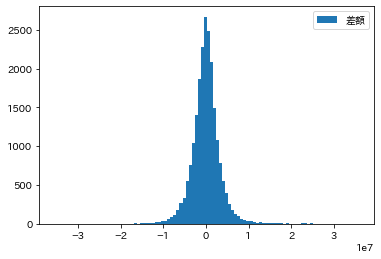

In [ ]:
plt.hist(actual_pred_df_test["差額"], bins=100, label="差額")
plt.legend()
plt.show()